In [1]:
import pandas as pd
import numpy as np
from math import radians
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import ConnectionStyle
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
housing = pd.read_csv('housing_data.csv', encoding='gbk')

C:\Users\HOME\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
housing.head(2)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7


In [4]:
housing.shape

(318851, 22)

In [5]:
housing_dropped = housing.drop(columns=['Unnamed: 0', 'Cid', 'url', 'id'])

In [6]:
housing_dropped.head(1)

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.01952,2016-08-09,1464.0,415.0,131.0,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7


## filling missing values

In [7]:
housing_null = housing_dropped.isnull().sum()
housing_null

Lng                         0
Lat                         0
tradeTime                   0
DOM                    157977
totalPrice                  0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
subway                     32
district                    0
dtype: int64

<AxesSubplot:>

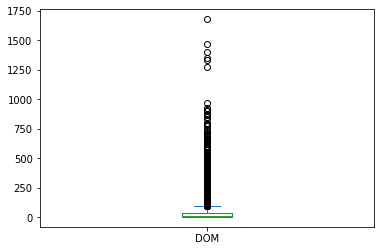

In [8]:
housing_dropped.DOM.plot(kind = 'box')

In [9]:
housing_no_missing = housing_dropped.copy()

In [10]:
housing_no_missing.DOM.mode()[0]

1.0

In [11]:
housing_no_missing.DOM.fillna(housing_no_missing.DOM.mode()[0], inplace=True)

In [12]:
housing_no_missing.isnull().sum()

Lng                     0
Lat                     0
tradeTime               0
DOM                     0
totalPrice              0
square                  0
livingRoom              0
drawingRoom             0
kitchen                 0
bathRoom                0
floor                   0
constructionTime        0
renovationCondition     0
buildingStructure       0
ladderRatio             0
elevator               32
subway                 32
district                0
dtype: int64

In [13]:
housing_no_missing.dropna(inplace=True)

In [14]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator         

## correcting format and outliers

In [15]:
housing_categorical = housing_no_missing.copy()

In [16]:
dict_elevator = {1: 'has elevator', 0: 'no elevator'}
dict_subway = {1: 'has subway', 0:'no subway'}
dict_buildingStructure = {1:'unknown', 2: 'mixed', 3: 'brick and wood', 4: 'concrete', 5: 'steel', 6: 'steel-concrete composite'}
dict_renovationCondition= {1: 'other', 2: 'rough', 3: 'Simplicity', 4: 'hardcover'}

In [17]:
housing_categorical.replace({'elevator': dict_elevator, 'subway': dict_subway, 'buildingStructure': dict_buildingStructure, 'renovationCondition': dict_renovationCondition}, inplace=True)

In [18]:
housing_categorical.head(1)

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.01952,2016-08-09,1464.0,415.0,131.0,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7


In [19]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator         

In [20]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

In [21]:
Housing_construction = housing_categorical.copy()

In [22]:
null_indexes = Housing_construction[Housing_construction['constructionTime'] == '未知'].index

In [23]:
Housing_construction.drop(index=null_indexes, inplace=True)

In [24]:
Housing_construction.shape

(299536, 18)

In [25]:
Housing_construction.loc[:, 'constructionTime'] = Housing_construction['constructionTime'].astype('int')

In [26]:
Housing_construction['constructionTime'].dtype

dtype('int32')

In [27]:
housing_floor = Housing_construction.copy()

In [28]:
housing_floor.floor =  housing_floor.floor.str.extract('(\d+)')

In [29]:
housing_floor.floor

0         26
1         22
2          4
3         21
4          6
          ..
318845     9
318846     5
318847    24
318848     7
318849     5
Name: floor, Length: 299536, dtype: object

In [30]:
housing_floor.floor.dtype

dtype('O')

In [31]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  object 
 7   drawingRoom          299536 non-null  object 
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  object 
 10  floor                299536 non-null  object 
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator         

<AxesSubplot:>

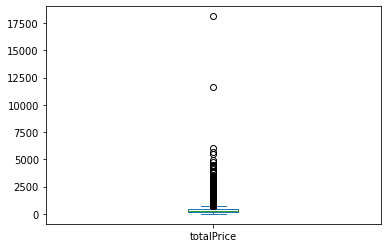

In [32]:
housing_floor.totalPrice.plot(kind = 'box')

In [33]:
Q1 = np.percentile(housing_floor.totalPrice,25)
Q3 = np.percentile(housing_floor.totalPrice,75)
IQR = np.percentile(housing_floor.totalPrice,75) - np.percentile(housing_floor.totalPrice,25)

LC = Q1 - (1.5 * IQR )
UC = Q3 + (1.5 * IQR )

In [34]:
outliers = housing_floor[(housing_floor.totalPrice < LC) | (housing_floor.totalPrice > UC)]

In [35]:
outliers.index = housing_floor[(housing_floor.totalPrice < LC) | (housing_floor.totalPrice > UC)].index

In [36]:
housing_no_outlier = housing_floor.drop(outliers.index)

In [37]:
housing_floor.shape[0] - housing_no_outlier.shape[0]

14496

<AxesSubplot:>

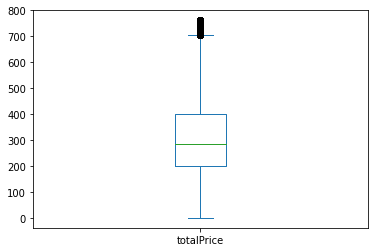

In [38]:
housing_no_outlier.totalPrice.plot(kind = 'box')

## adding new features

In [39]:
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()

φ1 = capital_Lat 
φ2 = np.radians(housing_capital.Lat)

λ1 = capital_Lng
λ2 = np.radians(housing_capital.Lng)

np.sin(capital_Lat)
housing_capital['distanceToCapital'] =  np.arccos(np.sin(φ1)*np.sin(φ2) + np.cos(φ1)*np.cos(φ2) * np.cos(λ2-λ1)) * 6371.0088

In [40]:
housing_capital.head(2)

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224


In [41]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS.totalPrice / housing_PPS.square) * 1000
housing_PPS.head(1)

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.01952,2016-08-09,1464.0,415.0,131.0,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931


C:\Users\HOME\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


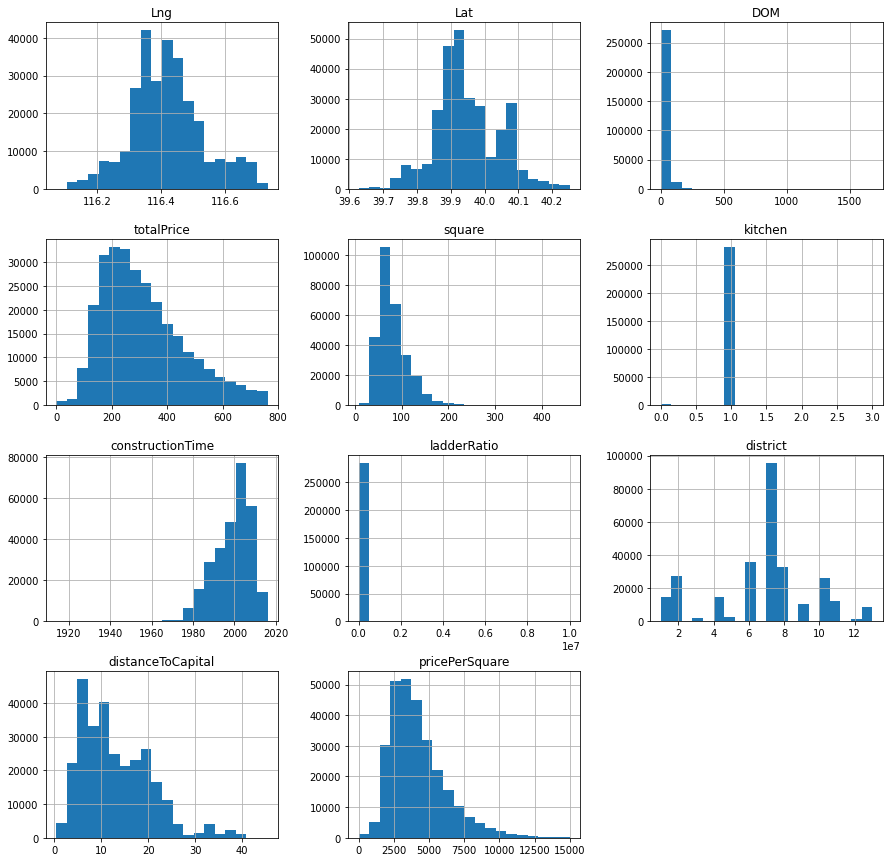

In [42]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

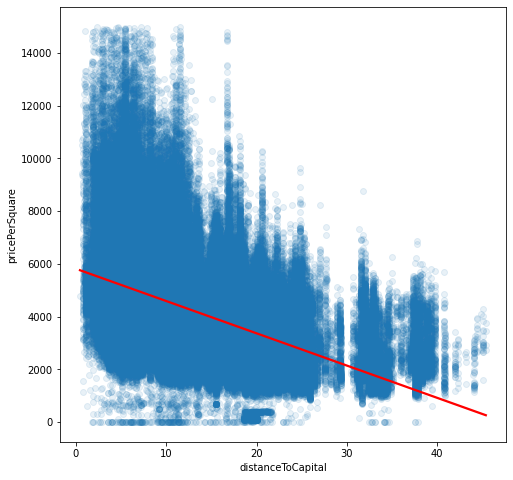

In [43]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

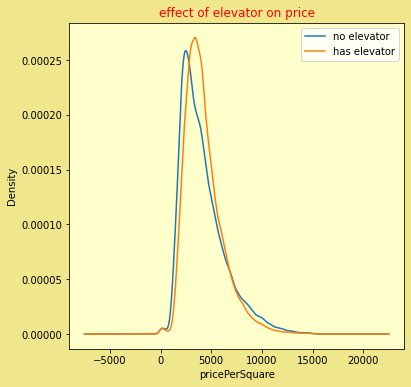

In [44]:
fig , ax = plt.subplots(figsize=(6,6), facecolor='khaki')
housing_PPS[housing_PPS['elevator'] == 'no elevator'].pricePerSquare.plot(kind='kde', label='no elevator')
housing_PPS[housing_PPS['elevator'] == 'has elevator'].pricePerSquare.plot(kind='kde', label='has elevator')
ax.set_title('effect of elevator on price', color='red')
ax.set_xlabel('pricePerSquare')
ax.set_facecolor('#ffffcc')
ax.legend()

## showing on map

In [45]:
housing_extended = housing_PPS.copy()

In [46]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

Text(0.5, 1.0, 'scatter plot')

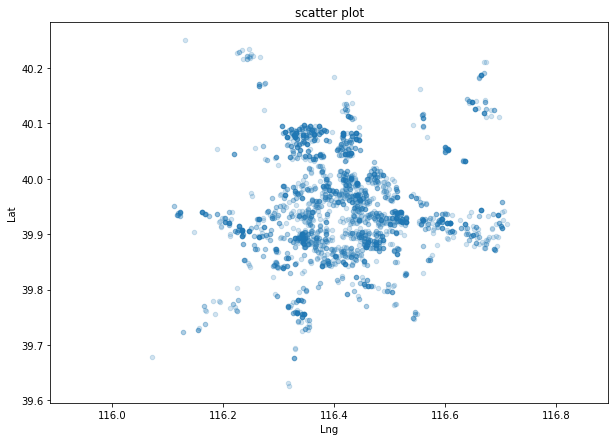

In [47]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax1, kind = 'scatter', alpha = 0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

(116.04057284999999, 116.74327815, 39.5958495, 40.281820499999995)

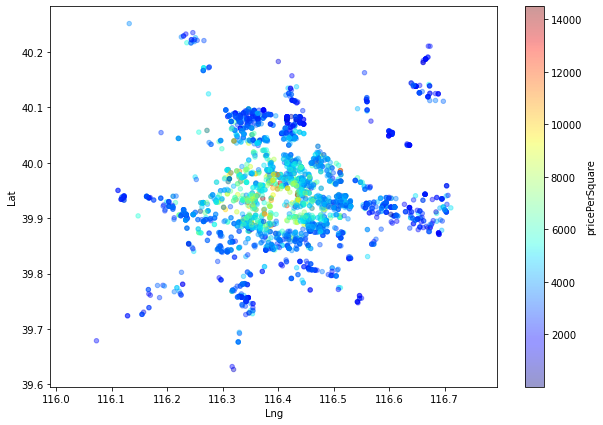

In [48]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax2, kind = 'scatter',alpha = 0.4,
                c = 'pricePerSquare', cmap=plt.get_cmap("jet") ,colorbar=True)

ax2.axis('equal')

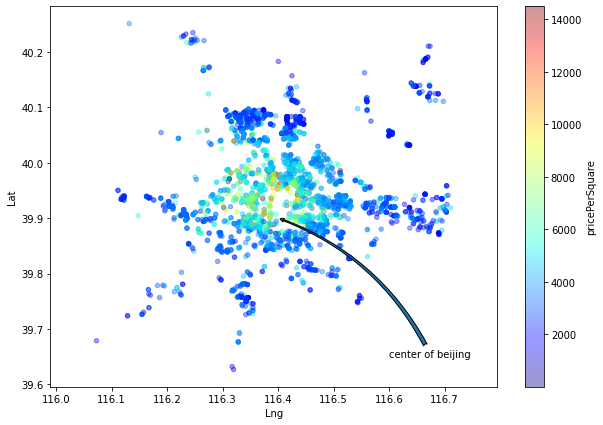

In [49]:
connectionstyle = ConnectionStyle("Arc3", rad=0.2)

ax2.annotate('center of beijing', xy=(116.4,39.9), xytext=(116.6, 39.65), arrowprops=dict(connectionstyle=connectionstyle,arrowstyle = 'fancy'))
fig2

In [50]:
ax2.texts

[Text(116.6, 39.65, 'center of beijing')]

(116.04057284999999, 116.74327815, 39.5958495, 40.281820499999995)

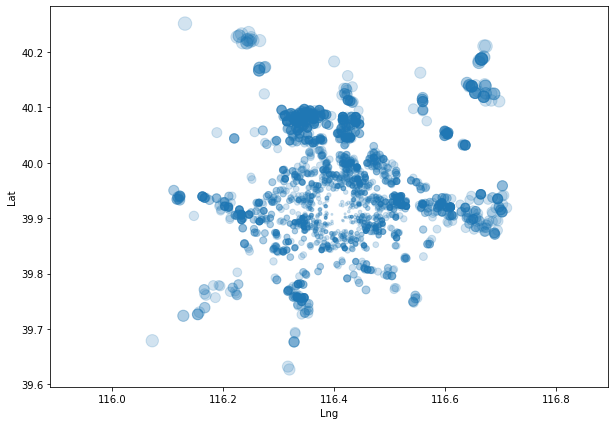

In [51]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2, s=housing_sample['distanceToCapital']*4)
ax3.axis('equal')

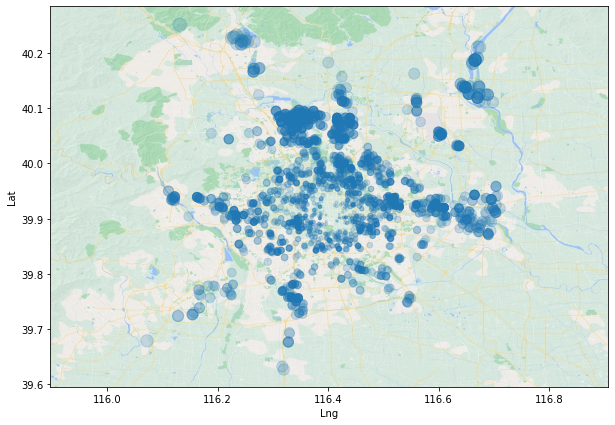

In [52]:
beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig3

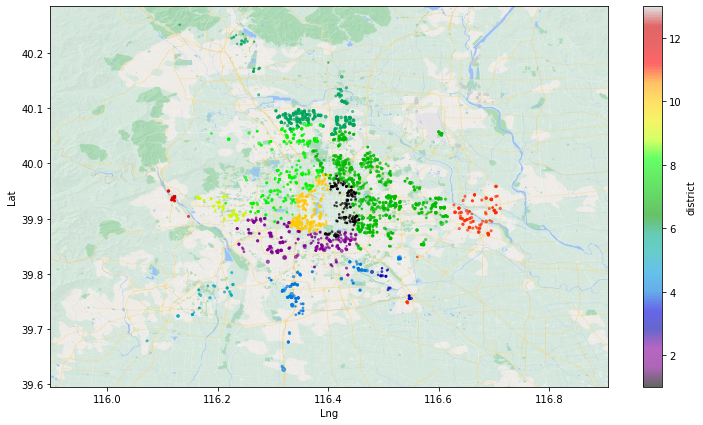

In [53]:
fig4 , ax4 = plt.subplots()
fig4.set_size_inches(12.5,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax4, kind = 'scatter', alpha = 0.6, s=housing_sample['square']/20,  c = 'district', cmap=plt.get_cmap("nipy_spectral") ,colorbar=True)

beijing_img = mpimg.imread('map1.jpg')
ax4.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])

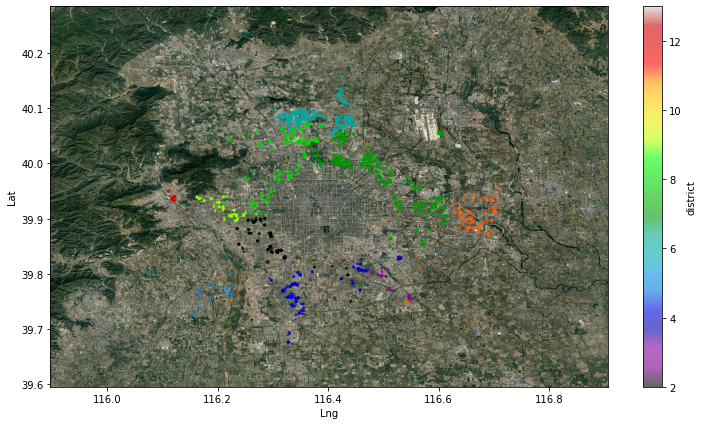

In [54]:
fig5 , ax5 = plt.subplots()
fig5.set_size_inches(12.5,7)

housing_sample_limited = housing_sample[(housing_sample['distanceToCapital']>10) & (housing_sample['distanceToCapital']<30)]
housing_sample_limited.plot(x = 'Lng' , y ='Lat' ,ax = ax5, kind = 'scatter', alpha = 0.6, s=housing_sample_limited['square']/20,  c = 'district', cmap=plt.get_cmap("nipy_spectral") ,colorbar=True)

beijing_img = mpimg.imread('map2.jpg')
ax5.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])

## time series analysis

In [55]:
districts_df = housing_extended.groupby('district')['pricePerSquare', 'square', 'constructionTime'].mean()

C:\Users\HOME\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [56]:
districts_df.constructionTime = 2021 - districts_df.constructionTime

In [57]:
districts_df['% houses with elevator'] = housing_extended[housing_extended.elevator == 'has elevator'].groupby('district').elevator.count() * 100 / housing_extended.groupby('district').elevator.count()

In [58]:
districts_df['% houses with subway'] = housing_extended[housing_extended.subway == 'has subway'].groupby('district').subway.count() * 100 / housing_extended.groupby('district').subway.count()

In [59]:
districts_df['frequent buildingStructure'] = housing_extended.groupby('district')['buildingStructure'].agg(pd.Series.mode)

In [60]:
districts_df.rename(columns={'pricePerSquare': 'pricePerSquare mean', 'square': 'square mean', 'constructionTime': 'building age mean'}, inplace=True)

In [61]:
districts_df = districts_df.loc[:, ['pricePerSquare mean', '% houses with elevator', '% houses with subway', 'square mean', 'building age mean', 'frequent buildingStructure']]

In [62]:
districts_df.head(2)

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite


In [63]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])

In [64]:
start = datetime.strptime('2010-01-01', '%Y-%m-%d')
start

datetime.datetime(2010, 1, 1, 0, 0)

In [65]:
trades_monthly_prices = housing_extended[housing_extended.tradeTime>=start].resample('M', on='tradeTime').pricePerSquare.mean()

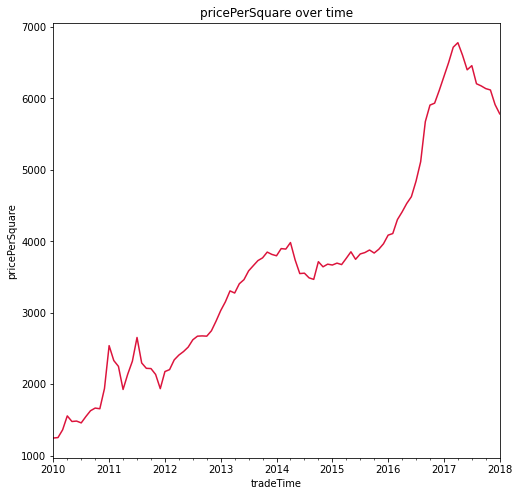

In [66]:
fig1 , ax1 = plt.subplots(figsize=(8,8))
trades_monthly_prices.plot(color = 'crimson')
ax1.set_xlabel('tradeTime')
ax1.set_ylabel('pricePerSquare')
ax1.set_title('pricePerSquare over time');

In [67]:
trades = housing_extended[housing_extended.distanceToCapital<15].resample('3M', on='tradeTime').tradeTime.count()

In [68]:
seasonal_trades = trades[trades.index>=start]

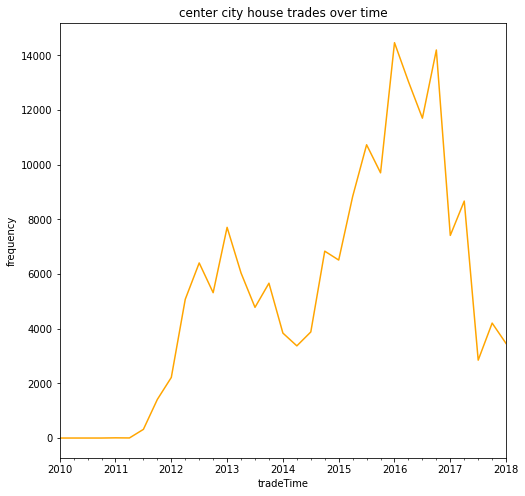

In [69]:
fig2 , ax2 = plt.subplots(figsize=(8,8))
seasonal_trades.plot(color = 'orange')
ax2.set_xlabel('tradeTime')
ax2.set_ylabel('frequency')
ax2.set_title('center city house trades over time');